# GOES stability indices

- Another GOES level 2 product is ""ABI-L2-DSI", which stands for "Advanced Baseline Imager, Level 2, Derived Stability Indices"'
- This product and all other products available on amazon, are listed
  [here](https://docs.opendata.aws/noaa-goes16/cics-readme.html)


## Some review

Stability indices are a shorthand proxy for CAPE, the convective available potential energy that lifts surface air upward into the atmosphere.

- A list of indices: [from NOAA](https://www.weather.gov/lmk/indices).  

- Remember how  CAPE is calculated, for example, here's an [ATSC 405 notebook](https://phaustin.github.io/a405_2024/notebooks/worksheets/cape_part1.html)

- How do you do this with the GOES channels?  Recall our {ref}`week6:weighting_funs` notebook and Stull Section 8.2.4.  The GOES-R satellite series has 7 channels with different weight functions you can look at
[at this link](https://cimss.ssec.wisc.edu/goes-wf/plot-viewer/#/plot-viewer/plot/model/abi18/default/20250323_1200Z/50,240).  For each pixel, the GOES postprocessing software fits temperature and vapor soundings to best reproduce those 7 radiance measurements, much like Roland does in that section.  This produces temperature and vapor values at 105 separate pressure levels, which are used to calculate the CAPE and the indices below.


## Simple RGB Figure
At the most simple level, here is how to produce an RGB from the GOES ABI data.

In [2]:
from goes2go.data import goes_nearesttime
import matplotlib.pyplot as plt 
from datetime import datetime
from pathlib import Path
import xarray

/Users/phil/mini310/envs/a301/lib/python3.13/site-packages/goes2go/data.py:673: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  within=pd.to_timedelta(config["nearesttime"].get("within", "1h")),
/Users/phil/mini310/envs/a301/lib/python3.13/site-packages/goes2go/NEW.py:185: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  within=pd.to_timedelta(config["nearesttime"].get("within", "1h")),


In [5]:
# Get an ABI Dataset
save_dir = Path.home() / "repos/a301/satdata/goes" 
writeit = False
if writeit:
    g = goes_nearesttime(
        datetime(2020, 6, 25, 18), satellite="goes16",product="ABI-L2-DSI", domain='C', 
          return_as="xarray", save_dir = save_dir, download = True, overwrite = False
    )
    the_path = g.path[0]
else:
    the_path = ("noaa-goes16/ABI-L2-DSIC/2020/177/18/"
                "OR_ABI-L2-DSIC-M6_G16_s20201771801172_e20201771803545_c20201771805311.nc")
    full_path = save_dir / the_path
    g = xarray.open_dataset(full_path,mode = 'r',mask_and_scale = True)

## CAPE

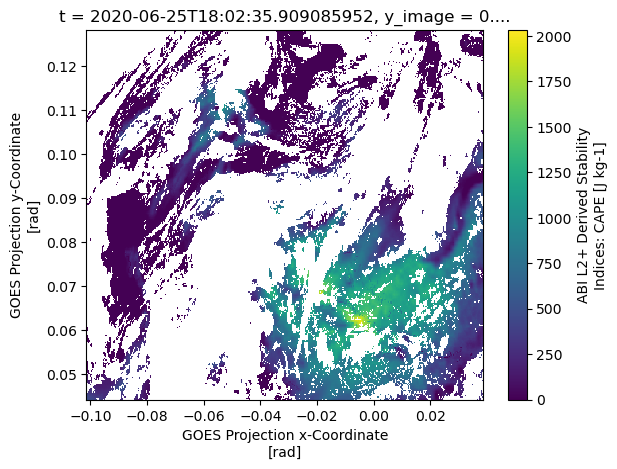

In [11]:
g['CAPE'].plot.imshow();

## Lifted Index

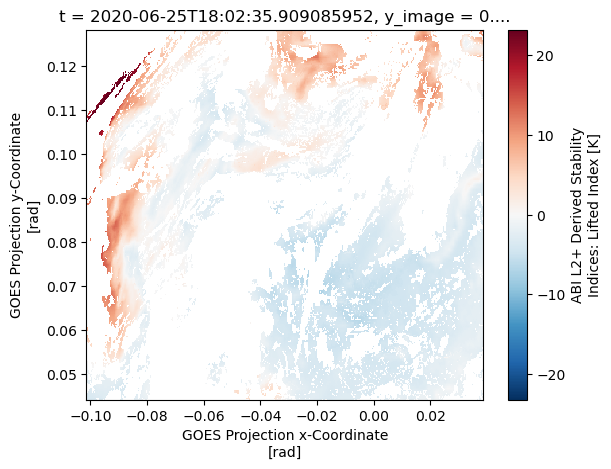

In [14]:
g['LI'].plot.imshow();

## Total totals

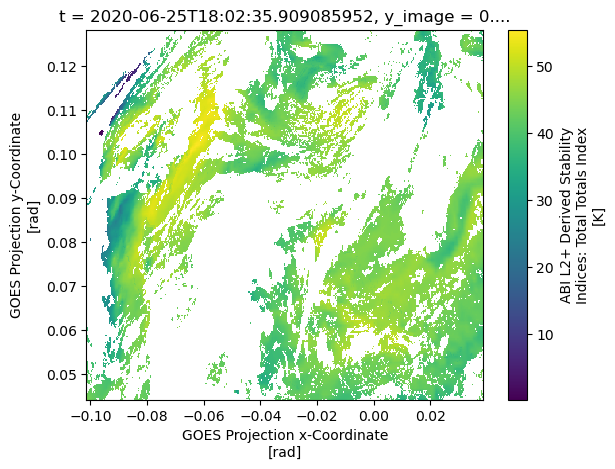

In [17]:
g['TT'].plot.imshow();

## Showalter Index

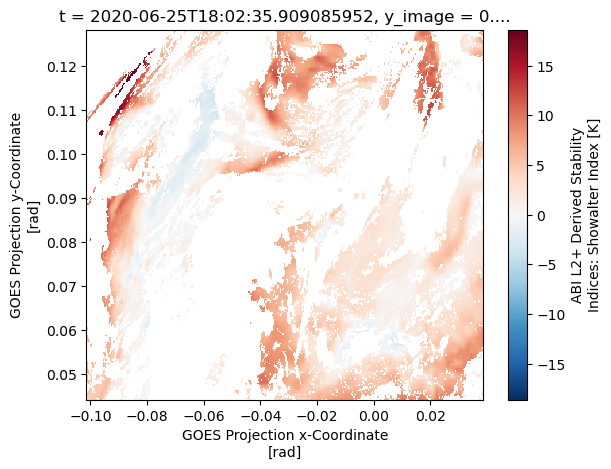

In [19]:
g['SI'].plot.imshow();

## K-Index

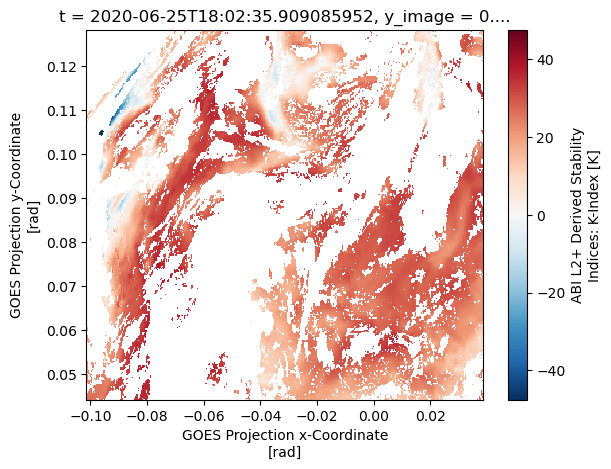

In [21]:
g['KI'].plot.imshow()